In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score

## Data Exploration

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [5]:
df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
for col in df.columns:
    print(col)

id
X_Minimum
X_Maximum
Y_Minimum
Y_Maximum
Pixels_Areas
X_Perimeter
Y_Perimeter
Sum_of_Luminosity
Minimum_of_Luminosity
Maximum_of_Luminosity
Length_of_Conveyer
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Empty_Index
Square_Index
Outside_X_Index
Edges_X_Index
Edges_Y_Index
Outside_Global_Index
LogOfAreas
Log_X_Index
Log_Y_Index
Orientation_Index
Luminosity_Index
SigmoidOfAreas
Pastry
Z_Scratch
K_Scatch
Stains
Dirtiness
Bumps
Other_Faults


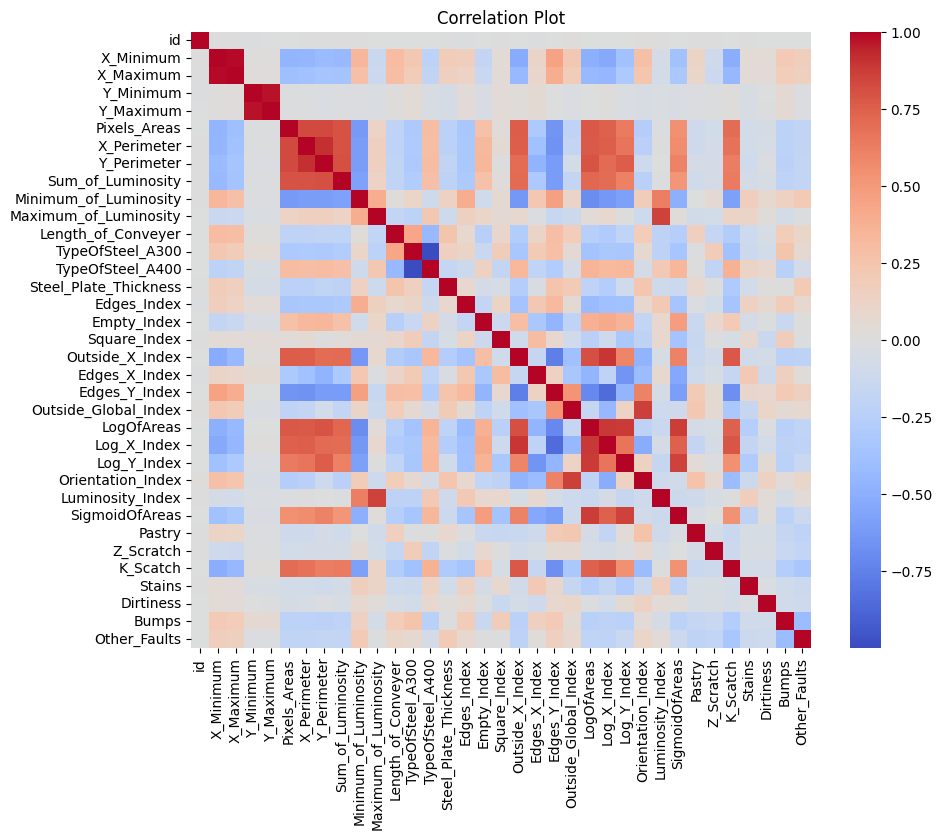

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame and the last 7 columns are the binary targets

# Separate features and targets
X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'id'], axis=1)
y = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = X_train.columns.tolist()

In [9]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are already defined

# It's a good practice to scale your features before applying Lasso, 
# as it is sensitive to the scale of input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Example adjustment for multiple binary targets
feature_importances = {}  # Dictionary to hold feature importance for each target

for target in y_train.columns:
    y = y_train[target]
    lasso = Lasso(alpha=0.001)
    lasso.fit(X_train_scaled, y)
    feature_importances[target] = abs(lasso.coef_)

# Convert the dictionary to a DataFrame for easier visualization
importance_df = pd.DataFrame(feature_importances, index=feature_names)
importance_df['mean_importance'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values(by='mean_importance', ascending=False)


In [10]:
importance_df["Pastry"]

LogOfAreas               0.000000
Minimum_of_Luminosity    0.025946
Log_X_Index              0.059933
TypeOfSteel_A300         0.023585
Length_of_Conveyer       0.032500
Luminosity_Index         0.000000
SigmoidOfAreas           0.000100
Steel_Plate_Thickness    0.001457
Outside_X_Index          0.001069
Edges_Index              0.011525
Square_Index             0.031325
Y_Perimeter              0.000000
Log_Y_Index              0.024344
Empty_Index              0.013623
Edges_Y_Index            0.009510
Orientation_Index        0.017713
Pixels_Areas             0.000757
X_Minimum                0.004594
X_Maximum                0.000000
Outside_Global_Index     0.000000
Edges_X_Index            0.002215
Sum_of_Luminosity        0.000000
Maximum_of_Luminosity    0.000267
X_Perimeter              0.000179
Y_Minimum                0.000000
TypeOfSteel_A400         0.000000
Y_Maximum                0.000000
Name: Pastry, dtype: float64

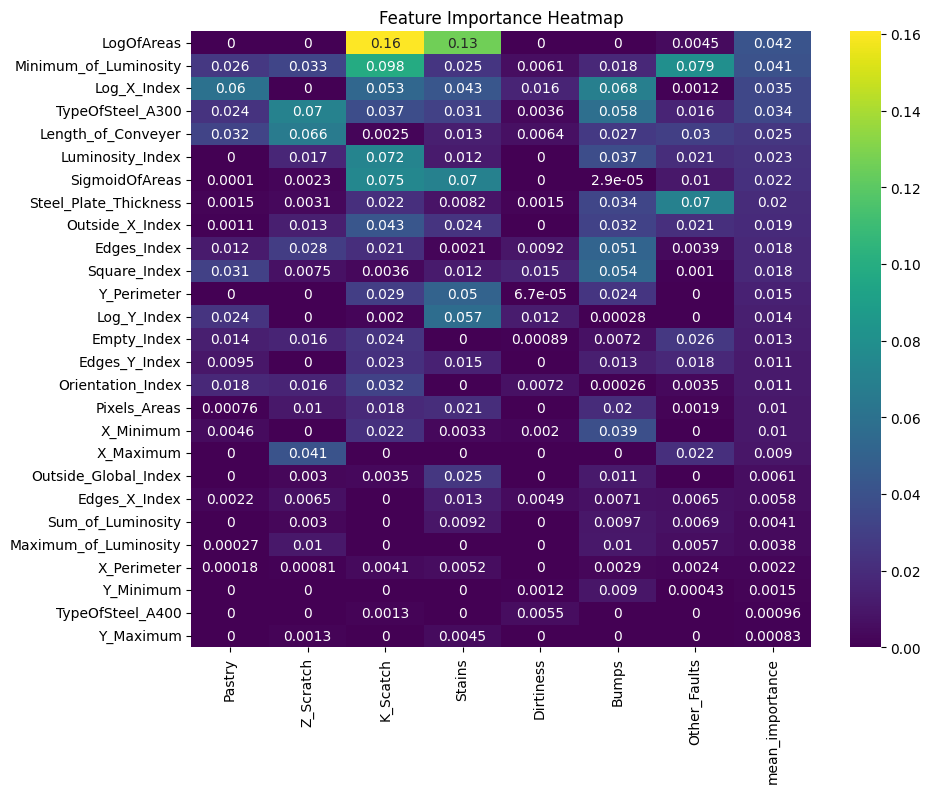

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(importance_df, annot=True, cmap='viridis')
plt.title('Feature Importance Heatmap')
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

In [13]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [14]:
def remove_unnecessary_targets(df, target_to_keep):
    # Define the columns to potentially drop (exclude the target column to keep)
    cols_to_drop = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'id']
    
    # Ensure the target column to keep is not in the cols_to_drop list
    if target_to_keep in cols_to_drop:
        cols_to_drop.remove(target_to_keep)
    
    # Use the drop method to remove the unnecessary columns
    # Ensure to specify axis=1 to indicate these are columns
    cleaned_df = df.drop(columns=cols_to_drop)
    
    return cleaned_df

# Example usage
cleaned_df = remove_unnecessary_targets(df, "Pastry")


In [15]:
def determine_important_features(df, target, alpha=0.001, threshold=0.01):
    # Separate features and target
    X = df.drop(target, axis=1)
    y = df[target]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit a Lasso model to the data
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Extract the feature importances (absolute values of coefficients)
    feature_importances = np.abs(lasso.coef_)

    # Create a mask for selecting features with importance above the threshold
    mask = feature_importances > threshold

    # Get the names of the important features
    important_features = X.columns[mask].tolist()

    return important_features

def create_relevant_feature_df(df, target, alpha=0.001, threshold=0.01):
    # Determine the important features
    important_features = determine_important_features(df, target, alpha, threshold)
    
    # Include the target in the list of columns to select
    columns_to_select = important_features + [target]
    
    # Create a DataFrame with only the relevant features and the target
    relevant_feature_df = df[columns_to_select]
    
    return relevant_feature_df

In [18]:


def optimize_model_with_gridsearch(df, target, model, param_grid, test_size=0.2, random_state=42, scoring='roc_auc'):

    # Split the data into training and testing sets
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize GridSearchCV with AUC scoring
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=2, verbose=1, n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model and score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    # Evaluate the best model on the test set using predict_proba for AUC calculation
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1
    test_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Best score (CV AUC): {best_score}")
    print(f"Test AUC: {test_auc}")
    
    return best_model, best_score

# Define your model and parameter grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Optimize the model
# Assuming 'relevant_feature_df' and the 'Pastry' target are defined
relevant_feature_df = create_relevant_feature_df(cleaned_df, "Pastry")
best_model, best_score = optimize_model_with_gridsearch(relevant_feature_df, "Pastry", model, param_grid)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best score (CV AUC): 0.8478489087007679
Test AUC: 0.8540250158705154
